In [1]:
%autosave 1

Autosaving every 1 seconds


## Simulate spike train

In [1]:
from main import simulate_spk_train, load_spk_train
import os

In [2]:
run_simulation = False
N, Nt = 64, 1000000
weight_factor = 2
baseline = -2
if run_simulation:
    confirm = input("Type 'Yes' to confirm that you want to rerun the simulation: it may take a copule of minutes.")
    if confirm != "Yes":
        run_simulation = False
        print("You didn't type 'Yes', so that the simulation will not be run.")
if run_simulation:
    print("Running the simulation...")
    spk_train = simulate_spk_train(N=N, Nt=Nt, baseline=baseline, weight_factor=weight_factor, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
else:
    print("Loading spike train data...")
    spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
    print("Loaded")

Loading spike train data...
Loaded


## Estimate covariance from spike train

In [4]:
from cov_mle import cov_parallel

In [5]:
run_covariance = True
dp = 0.6
n_processes = 16
if run_covariance:
    confirm = input("Type 'Yes' to confirm that you want to run the covariance estimation: it may take a few hours.")
    if confirm != "Yes":
        run_covariance = False
        print("You didn't type 'Yes', so that the covariance estimation will not be run.")
if run_covariance:
    print("Estimating the spike train covariance...")
    cov_parallel(spk_train.spike_train, dp=dp, n_processes=n_processes)
else:
    print("Loading covariance data...")


Type 'Yes' to confirm that you want to run the covariance estimation: it may take a few hours. Yes


Estimating the spike train covariance...
2080 covariance will be estimated for 64 neurons
[[0, 0], [0, 1], [1, 1], [0, 2], [1, 2], [2, 2], [0, 3], [1, 3], [2, 3], [3, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [0, 5]]
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
correlation estimation with 600000 data...
Time took for covariance estimation 29.93 s
Time took for covariance estimation 30.47 s
Time 

In [6]:
dp = 0.8
n_processes = 16
cov_parallel(spk_train.spike_train, dp=dp, n_processes=n_processes)

2080 covariance will be estimated for 64 neurons
[[0, 0], [0, 1], [1, 1], [0, 2], [1, 2], [2, 2], [0, 3], [1, 3], [2, 3], [3, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [0, 5]]
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
correlation estimation with 800000 data...
Time took for covariance estimation 41.52 s
Time took for covariance estimation 41.99 s
Time took for covariance estimation 42.07 s
Ti

## Infer filters

In [ ]:
from filter_inference import infer_J_ij

In [ ]:
dp = 1
obs = 2
N_i = 0 #[i for i in range(obs)]
N_j = 0
# # for dp in [0.2, 0.4, 0.6, 0.8, 1]:
for obs in [2, 4, 8, 16, 32, 48, 64]:
    N_i = [i for i in range(obs)]
    for N_j in range(obs):
        inferred_no_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8)


In [ ]:
## shuffle observed neurons: for 32-neuron case
observed = np.random.choice(64, 32, replace=False)
N_i = [i for i in range(obs)]
for N_j in range(obs):
    inferred_no_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, with_basis=False, save=True, observed_neurons=observed, tol=1e-8)

In [ ]:
## cross coupling filters



## Correlation between cov and inferred filter

## Gaussian process approximation

In [13]:
from theory import *
def alpha(t, tau=1): return 1/tau**2*t*np.exp(-t/tau)

In [16]:
# spk_train = load_spk_train(64, 1000000, filename=f"spk_train_64_1000000")
spk_train = load_spk_train(64, 1000000, filename=f"spk_train_64_1000000_b_-2_weight_2")
spk_train.weight_matrix

array([[-0.        ,  0.10284459, -0.        , ..., -0.43606184,
         0.        ,  0.        ],
       [-0.26484709,  0.        ,  0.20594949, ...,  0.11785865,
         0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.50739335,
        -0.13765611,  0.        ],
       ...,
       [-0.46598976,  0.27447241, -0.        , ...,  0.        ,
        -0.        ,  0.11254828],
       [ 0.        , -0.        , -0.68212663, ...,  0.36966826,
        -0.        , -0.83288497],
       [-0.09080155,  0.        , -0.26179423, ...,  0.        ,
        -0.3145699 , -0.        ]])

In [5]:
c_tree_level, t_range = plot_cov_time(spk_train.weight_matrix, -2)

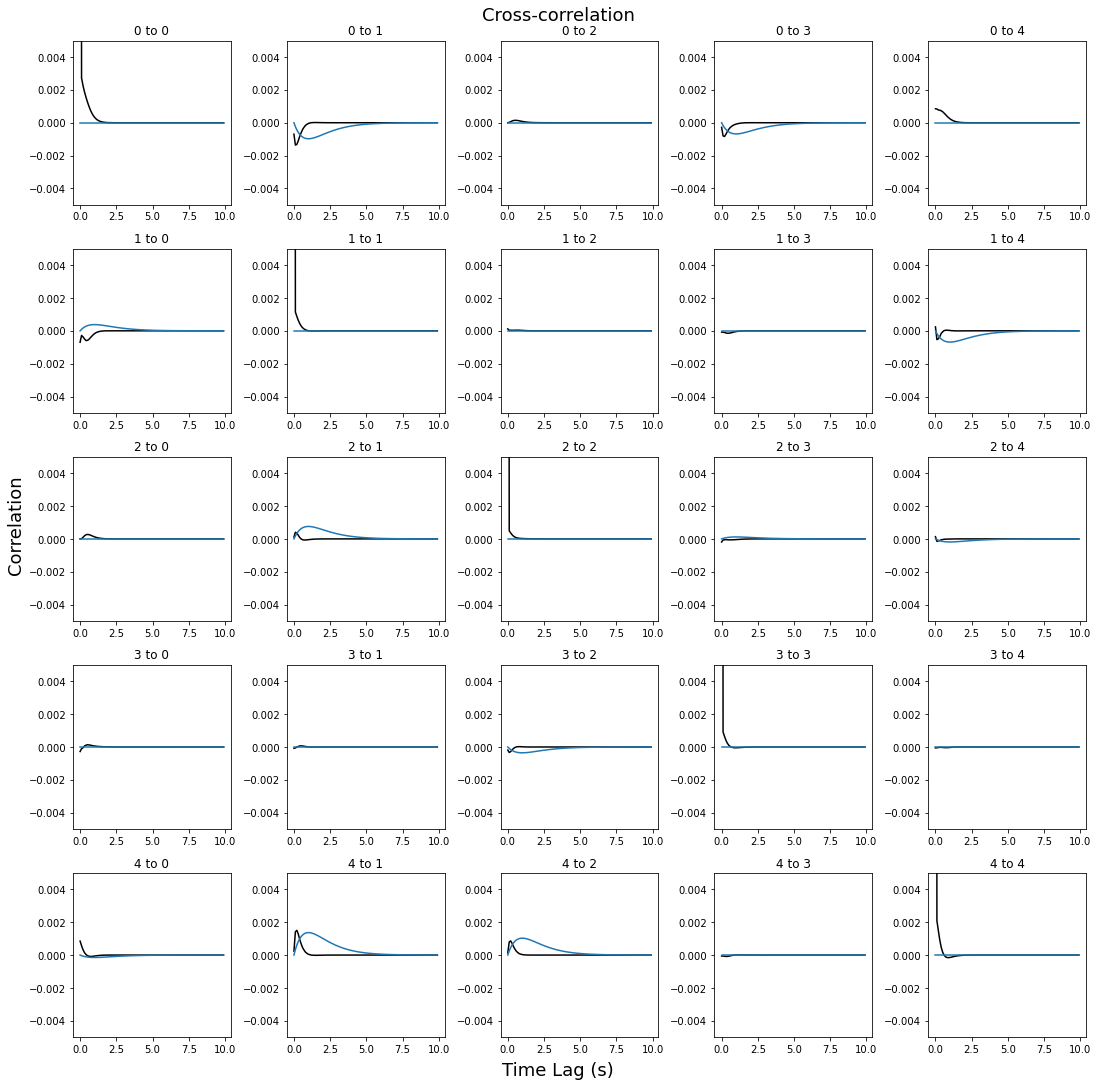

In [22]:
c_tree_level_t = np.fft.ifft(c_tree_level)
N_network = 64
start = 0
N_i, N_j = 5,5
fig, axes = plt.subplots(nrows=N_i, ncols=N_j, figsize=(3*N_j, 3*N_i))
for i in range(N_i):
    for j in range(N_j):
        axes[i, j].plot(np.arange(start, 100)*0.1, c_tree_level_t[N_network*i+j,100:][start:].real,color='black') # suppress 0 lag for autocorrelation
        axes[i, j].set_title(f'{i} to {j}')
        axes[i, j].set_ylim(-0.005, 0.005)
        axes[i, j].plot(np.arange(start, 100)*0.1, [0.01*spk_train.weight_matrix[j, i] * alpha(t) for t in np.arange(start, 100)*0.1])
#         print(spk_train.weight_matrix[i, j])
fig.suptitle('Cross-correlation', size=18) 
fig.text(0.5, -0.01, 'Time Lag (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Correlation', va='center', rotation='vertical', size=18)   
fig.tight_layout()
plt.show()


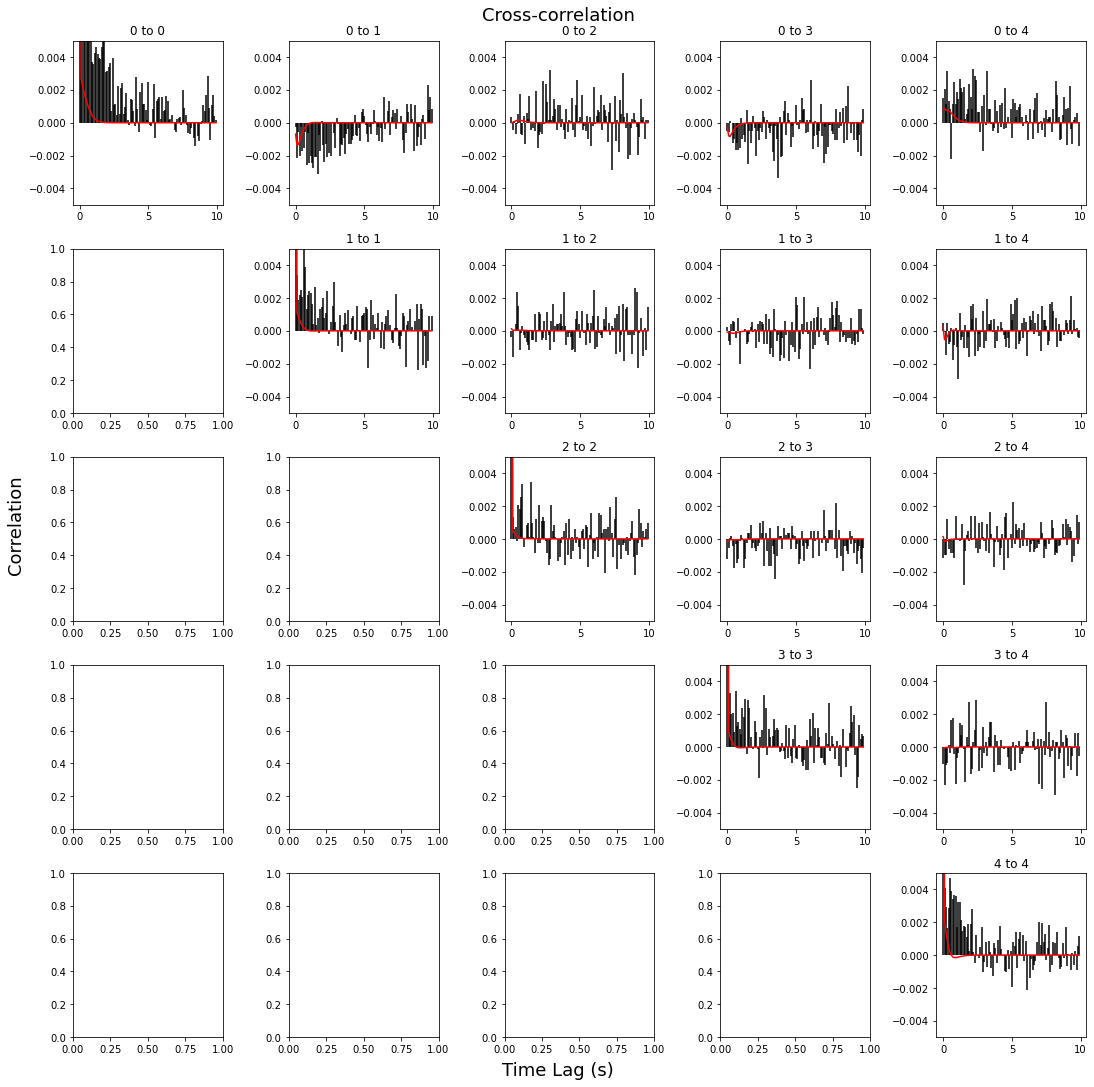

In [8]:
start = 0
cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27"
dp=1
N_i, N_j = 5, 5
fig, axes = plt.subplots(nrows=N_i, ncols=N_j, figsize=(3*N_j, 3*N_i))
x = 0
for i in range(N_i):
    for j in range(i, N_j):
        
        cov = np.loadtxt(os.path.join(cov_path, f"cov_{i}_{j}_{int(dp*1000000)}"))
        axes[i, j].vlines(np.arange(start, 100)*0.1, 0, cov[start:],colors='black') # suppress 0 lag for autocorrelation
        axes[i, j].set_title(f'{i} to {j}')
        axes[i, j].set_ylim(-0.005, 0.005)
        x += 1
        axes[i, j].plot(np.arange(start, 100)*0.1, c_tree_level_t[N_network*i+j,100:][start:].real,color='red') # suppress 0 lag for autocorrelation
        axes[i, j].set_title(f'{i} to {j}')
        axes[i, j].set_ylim(-0.005, 0.005)

fig.suptitle('Cross-correlation', size=18) 
fig.text(0.5, -0.01, 'Time Lag (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Correlation', va='center', rotation='vertical', size=18)   
fig.tight_layout()
plt.show()

(array([ 3.,  5., 11., 12.,  7.,  8.,  5.,  2.,  7.,  4.]),
 array([0.06776328, 0.08285524, 0.0979472 , 0.11303916, 0.12813112,
        0.14322308, 0.15831504, 0.173407  , 0.18849896, 0.20359093,
        0.21868289]),
 <BarContainer object of 10 artists>)

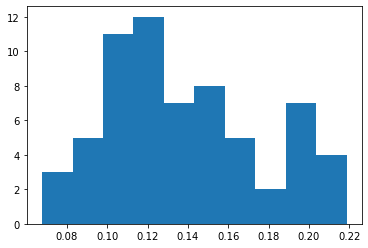

In [8]:
plt.hist(rates_ss(spk_train.weight_matrix, -2, 1000))

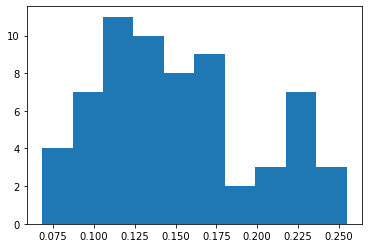

In [12]:
plt.hist(np.mean(spk_train.spike_train,0)*10);

## Figures

In [49]:
# data volume
from filter_inference import calculate_corr_all
import matplotlib.pyplot as plt
import numpy as np
# spike train: data/spk_train_64_1000000_b_-2_weight_2

# folders:
# data/2022-10-04/: estimated spike train covariance for data volume 0.2, 0.4, 0.6, 0.8
# data/2022-09-27: estimated spike train covariance for data volume 1

# data/2022-10-05-data-volume: MLE inferred filter for data volume 0.2, 0.4, 0.6, 0.8, 1; with observed neuron
# 2, 4, 8, 16, 32, 64

# data/2022-10-11-shuffled-32-observed_run 1: MLE inferred filter for data volume 1; random shuffled 32 observed neuron

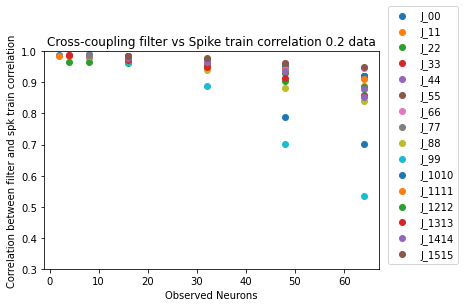

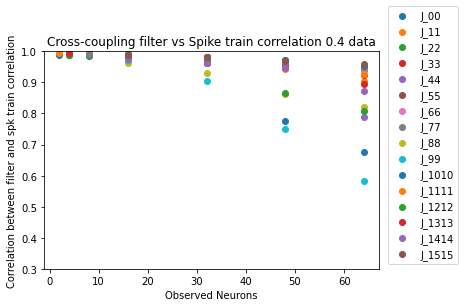

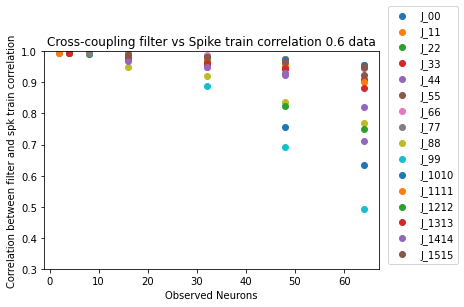

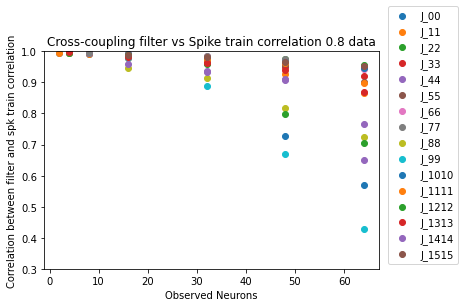

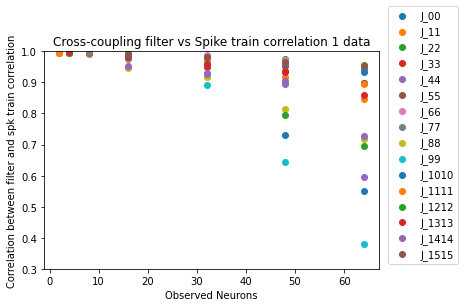

In [53]:
# self coupling
# dp = 0.2
for dp in [0.2, 0.4, 0.6, 0.8, 1]:
    for N in [i for i in range(16)]:
        N_i, N_j = N, N
        if dp == 1:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
        else:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-10-04", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
    #     print(corr)
        obs = list(corr.keys())
        corr = list(corr.values())

        plt.scatter([i for i in obs], corr, label=f"J_{N_i}{N_j}")
        plt.ylim(0.3,1)
    plt.xlabel("Observed Neurons")
    plt.ylabel("Correlation between filter and spk train correlation")
    plt.title(f"Cross-coupling filter vs Spike train correlation {dp} data")
    plt.legend(bbox_to_anchor=(1.25, 0), loc='lower right')
    plt.show()
#     plt.savefig(f"Cross_filter_{N+1}.png", bbox_inches='tight')

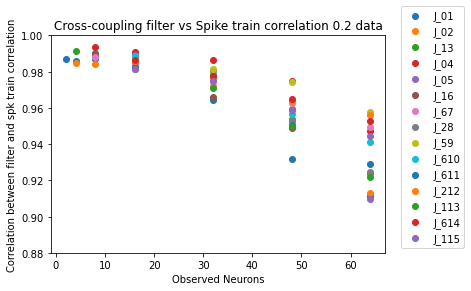

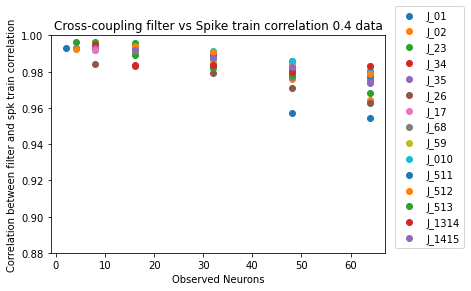

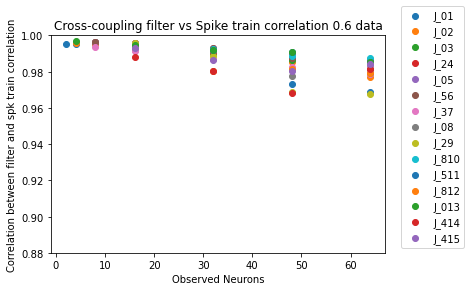

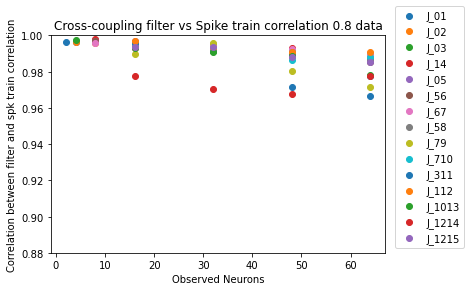

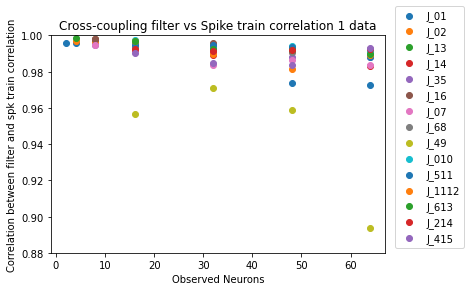

In [52]:
# cross coupling
for dp in [0.2, 0.4, 0.6, 0.8, 1]:
    cov = []
    for N in [i for i in range(1,16)]:
        N_j = N
        N_i = 0 if N == 0 else np.random.choice(N, 1)[0]
        if dp == 1:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
        else:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-10-04", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
    #     print(corr)
        obs = list(corr.keys())
        corr = list(corr.values())

        plt.scatter([i for i in obs], corr, label=f"J_{N_i}{N_j}")
        cov.append(corr)
#     plt.boxplot(cov)
        plt.ylim(0.88,1)
    plt.xlabel("Observed Neurons")
    plt.ylabel("Correlation between filter and spk train correlation")
    plt.title(f"Cross-coupling filter vs Spike train correlation {dp} data")
    plt.legend(bbox_to_anchor=(1.25, 0), loc='lower right')
    plt.show()

## Randomly sampled 32 observed neurons

In [3]:
from filter_inference import calculate_corr
import numpy as np
import matplotlib.pyplot as plt

In [7]:
corr_all = []
for trial in [1,2,3]:
    observed = np.loadtxt(f"/home/tong/hidden-neuron-simulation/data/2022-10-11-shuffled-32-observed_run_{trial}/observed_neurons")
    observed_pairs = [[int(i),int(j)] for i in observed for j in observed]
    corr = []
    for pair in observed_pairs:
        if pair[1] < pair[0]:
            continue
    #     print(pair)
        corr.append(calculate_corr(N_i=pair[0], N_j=pair[1], obs=32, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path=f"/home/tong/hidden-neuron-simulation/data/2022-10-11-shuffled-32-observed_run_{trial}/", dp=1)
    )
    corr_all.append(corr)

In [15]:
observed = [i for i in range(32)]
observed_pairs = [[int(i),int(j)] for i in observed for j in observed]
corr = []
for pair in observed_pairs:
    if pair[1] < pair[0]:
        continue
#     print(pair)
    corr.append(calculate_corr(N_i=pair[0], N_j=pair[1], obs=32, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path=f"/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume/", dp=1)
)
corr_all.append(corr)

In [22]:
np.std(corr_all[0])

0.016600150166693525

In [23]:
np.std(corr_all[-1])

0.015591673659891994

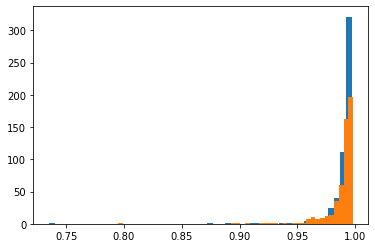

In [18]:
plt.hist(corr_all[0],50);
plt.hist(corr_all[-1],50);


In [2]:
calculate_corr(N_i=32, N_j=32, obs=32, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-11-shuffled-32-observed_run_1/", dp=1)

cov [ 1.00004276e+00  1.33816425e-03  2.83366154e-03  9.93049486e-04
  4.21412057e-03  5.90415601e-04  3.02819968e-04  1.68327900e-03
  1.74079813e-03  1.52243351e-05  3.40885280e-03  2.83366154e-03
  1.56824075e-03  3.02819968e-04  3.12125717e-03  6.47934727e-04
  1.05056861e-03  2.25847027e-03  3.60339094e-04  1.45320250e-03
  2.94869979e-03  1.30262588e-04  9.93049486e-04  1.28064512e-03
  3.60339094e-04  1.16560687e-03  7.27434617e-05  3.02819968e-04
 -9.98139179e-05  3.02819968e-04  8.20492107e-04  1.68327900e-03
 -9.98139179e-05  6.47934727e-04 -9.98139179e-05  1.45320250e-03
 -6.75005183e-04  1.28064512e-03  7.62972980e-04  7.05453854e-04
  4.17858221e-04 -2.72371298e-04 -5.59966930e-04 -9.62600816e-04
 -5.59966930e-04 -4.22947914e-05  1.22312599e-03 -5.59966930e-04
  9.93049486e-04 -1.57333044e-04  7.27434617e-05  3.60339094e-04
  5.90415601e-04  3.02819968e-04  2.20095114e-03  5.32896474e-04
  1.33816425e-03  7.05453854e-04  1.22312599e-03 -1.02011994e-03
  4.75377348e-04 -1.3

/home/tong/hidden-neuron-simulation/src/filter_inference.py:104: UserWarning: loadtxt: Empty input file: "/home/tong/hidden-neuron-simulation/data/2022-10-11-shuffled-32-observed_run_1/J_32_32_32_observed_1000000_data.txt"
  filter = np.loadtxt(os.path.join(filter_path, f"J_{N_i}_{N_j}_{obs}_observed_{int(dp*1000000)}_data.txt"))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 99 and the array at index 1 has size 0

## todo:
1. tree-level covariance approximation compared to estimated covariance of the spike train
2. 2 runs of 32 random sampling